**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Topic 10: Principal Coordinate Analysis (PCoA)

Rather than using raw data as in a CA, PCoA takes a (dis)similarity matrix as input; in other words, any of the dissimilarities calculated by **vegan**’s `vegdist()` function can be used, which is great as they are well-suited to species data. If dissimilarities are Euclidean distances, then PCoA is equal to PCA. Another thing that makes a PCoA more useful is that (dis)similarity matrices calculated from quantitative, semi-quantitative, qualitative, and mixed variables can be handled.

PCoA scaling takes a set of dissimilarities and returns a set of points such that when plotted in 2D or 3D space the distances between the points are approximately equal to the dissimilarities. In other words, it tries to represent species dissimilarities as Euclidian distances.

## Set-up the analysis environment

In [3]:
library(tidyverse)
library(vegan)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## The Doubs River data

We continue to use the species data:

In [2]:
spe <- read.csv("../Num_Ecol_R_book_ed1/DoubsSpe.csv")
spe <- dplyr::select(spe, -1)
spe <- dplyr::slice(spe, -8)

## Calculate a suitable dissimilarity matrix

You may or may not want to calculate a dissimilarity index upfront (see below). Here I calculate the Bray-Curtis dissimilarity which is appropriate for abundance data:

In [3]:
spe_bray <- vegdist(spe)

## Do the PCoA

<!-- The **vegan** function `cmdscale()` can be used for PCoA: -->
The book *Numerical Ecology in R* uses a built-in function `cmdscale()` or the function `pcoa()` in **ape** for its PCoA calculation. The **vegan** function `capscale()` can also be used for PCoA, and this is the approach I take here. The 'CAP' in `capscale()` stands for 'Canonical Analysis of Principal Coordinates'. `capscale()` works differently from `rda()` or `cca()` in that we can only specify the input via a formula interface. See `?capscale` for information. To run a PCoA without constraints we use `1` on the righthand side of the formula, with the dissimilarity matrix on the left. Here is how:

In [4]:
# spe_pcoa <- cmdscale(spe_bray, k = nrow(spe) - 1, eig = TRUE)
spe_pcoa <- capscale(spe_bray ~ 1)
spe_pcoa

Call: capscale(formula = spe_bray ~ 1)

              Inertia Rank
Total          6.7621     
Unconstrained  7.0583   17
Imaginary     -0.2963   11
Inertia is squared Bray distance 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
3.695 1.098 0.710 0.415 0.305 0.192 0.157 0.132 
(Showing 8 of 17 unconstrained eigenvalues)


When we do a `summary()` of the output we see that the results are similar to that of PCA and CA, but the **Species scores** are missing because information about original variables (species) are not available. This is due to the fact that in this instance input into `capscale()` was the square (site × site) dissimilarity matrix produced from the species table, not the raw species table itself. Here is the output:

In [5]:
summary(spe_pcoa)


Call:
capscale(formula = spe_bray ~ 1) 

Partitioning of squared Bray distance:
              Inertia Proportion
Total           7.058          1
Unconstrained   7.058          1

Eigenvalues, and their contribution to the squared Bray distance 

Importance of components:
                        MDS1   MDS2   MDS3    MDS4    MDS5    MDS6    MDS7
Eigenvalue            3.6953 1.0985 0.7105 0.41497 0.30456 0.19179 0.15697
Proportion Explained  0.5235 0.1556 0.1007 0.05879 0.04315 0.02717 0.02224
Cumulative Proportion 0.5235 0.6792 0.7798 0.83862 0.88177 0.90894 0.93118
                         MDS8    MDS9   MDS10    MDS11    MDS12   MDS13
Eigenvalue            0.13191 0.12943 0.08668 0.046158 0.038645 0.02746
Proportion Explained  0.01869 0.01834 0.01228 0.006539 0.005475 0.00389
Cumulative Proportion 0.94987 0.96820 0.98048 0.987023 0.992498 0.99639
                         MDS14    MDS15     MDS16     MDS17
Eigenvalue            0.013065 0.007088 0.0040395 0.0013006
Proportion Explain

We can provide the raw species table instead and request that `capscale()` calculates the required dissimilarity indices by automagically calling `vegdist()`. The advantage of this approach is that it adds species scores as weighted sums of (residual) community matrix, whereas only providing the pre-calculated dissimilarity matrix provides no fixed method for adding species scores. **I advocate providing a raw species table to `capscale()` to retain the species information**. This avoids many problems later on, such as having to calculate the weighted species scores ourselves.

In [6]:
spe_pcoa <- capscale(spe ~ 1, distance = "bray")
spe_pcoa

Call: capscale(formula = spe ~ 1, distance = "bray")

              Inertia Rank
Total          6.7621     
Unconstrained  7.0583   17
Imaginary     -0.2963   11
Inertia is squared Bray distance 
Species scores projected from ‘spe’ 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
3.695 1.098 0.710 0.415 0.305 0.192 0.157 0.132 
(Showing 8 of 17 unconstrained eigenvalues)


`summary()` now produces a familiar and more complete output:

In [7]:
summary(spe_pcoa)


Call:
capscale(formula = spe ~ 1, distance = "bray") 

Partitioning of squared Bray distance:
              Inertia Proportion
Total           7.058          1
Unconstrained   7.058          1

Eigenvalues, and their contribution to the squared Bray distance 

Importance of components:
                        MDS1   MDS2   MDS3    MDS4    MDS5    MDS6    MDS7
Eigenvalue            3.6953 1.0985 0.7105 0.41497 0.30456 0.19179 0.15697
Proportion Explained  0.5235 0.1556 0.1007 0.05879 0.04315 0.02717 0.02224
Cumulative Proportion 0.5235 0.6792 0.7798 0.83862 0.88177 0.90894 0.93118
                         MDS8    MDS9   MDS10    MDS11    MDS12   MDS13
Eigenvalue            0.13191 0.12943 0.08668 0.046158 0.038645 0.02746
Proportion Explained  0.01869 0.01834 0.01228 0.006539 0.005475 0.00389
Cumulative Proportion 0.94987 0.96820 0.98048 0.987023 0.992498 0.99639
                         MDS14    MDS15     MDS16     MDS17
Eigenvalue            0.013065 0.007088 0.0040395 0.0013006
Prop

We can unpack what is inside the results, and there we can see that we can access the eigenvalues as we did for PCA and CA:

In [8]:
# str(spe_pcoa) # not shown due to length of output

The percentage inertia explained by the first three axes is therefore:

In [9]:
round(sum(spe_pcoa$CA$eig[1:3]) / sum(spe_pcoa$CA$eig) * 100, 2)

[1] 77.98

See *Numerical Ecology in R* (pp. 140 to 145) for information about the interpretation of a PCoA and the ordination diagrams shown below.

## Ordination diagrams

We create the ordination diagrammes as before:

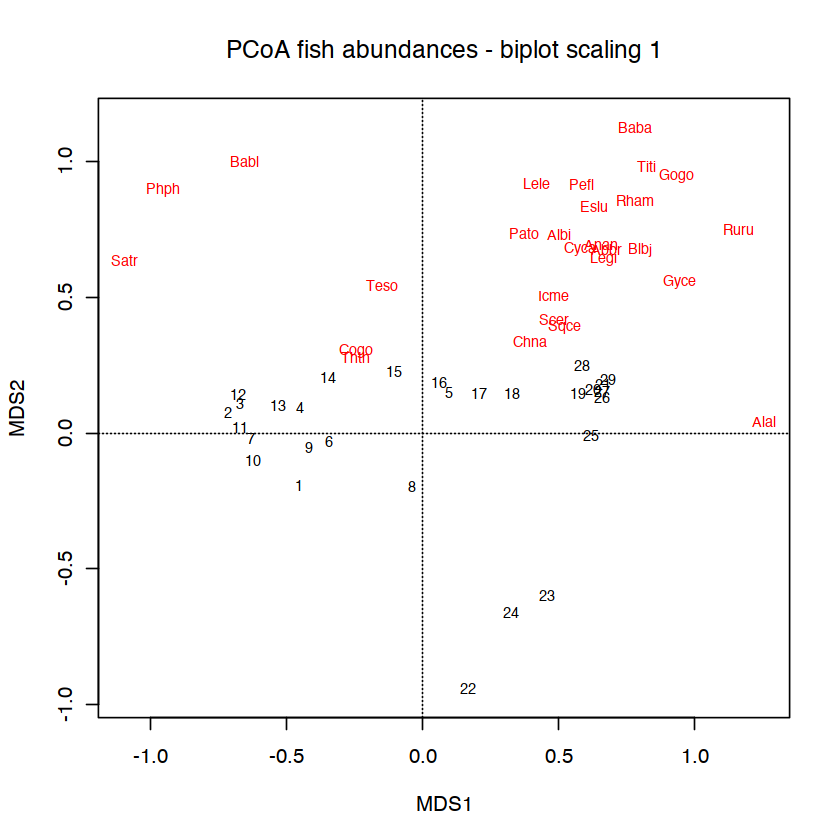

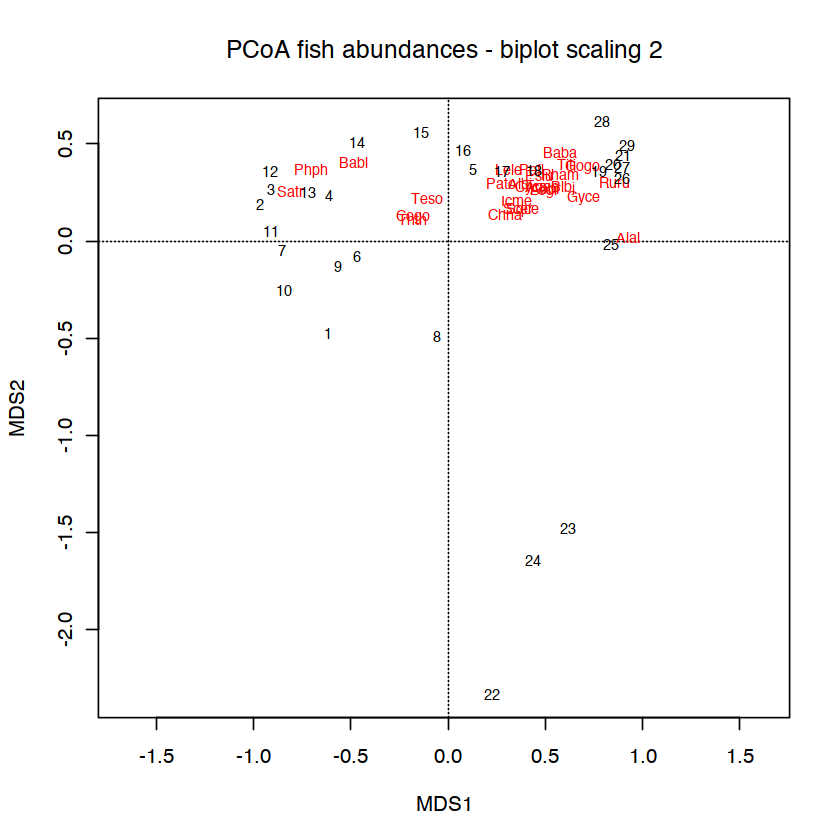

In [10]:
plot(spe_pcoa, scaling = 1, main = "PCoA fish abundances - biplot scaling 1")
plot(spe_pcoa, scaling = 2, main = "PCoA fish abundances - biplot scaling 2")

Scaling 1 and scaling 2 is the same as in CA.

The plots above work okay, but we can improve them. Note that you can also apply these improvements to PCA and CA ordinations. Let us build plots from scratch:

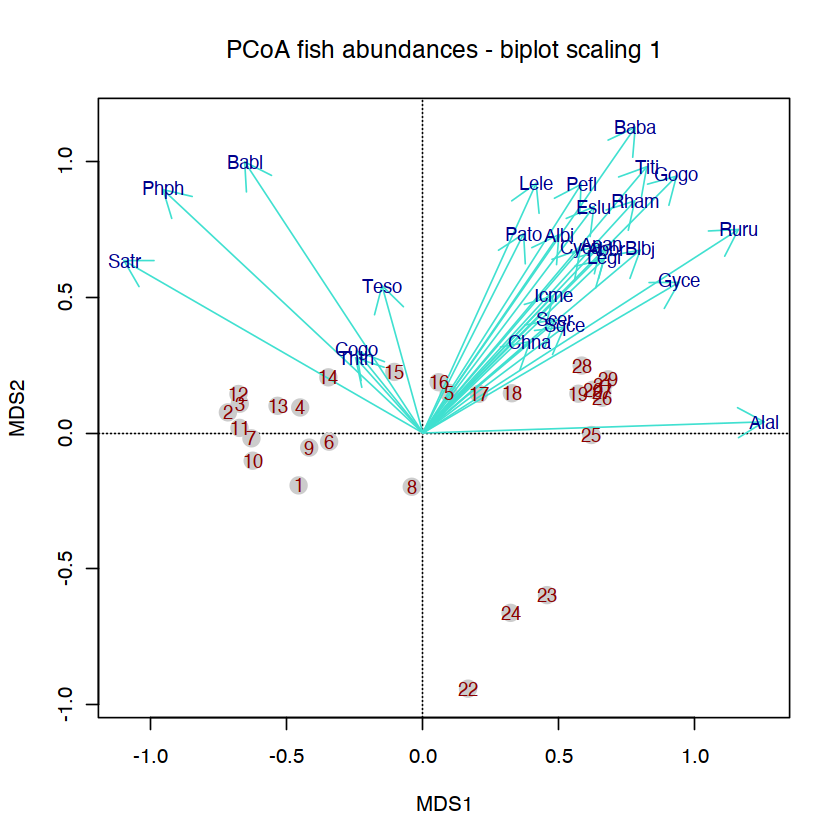

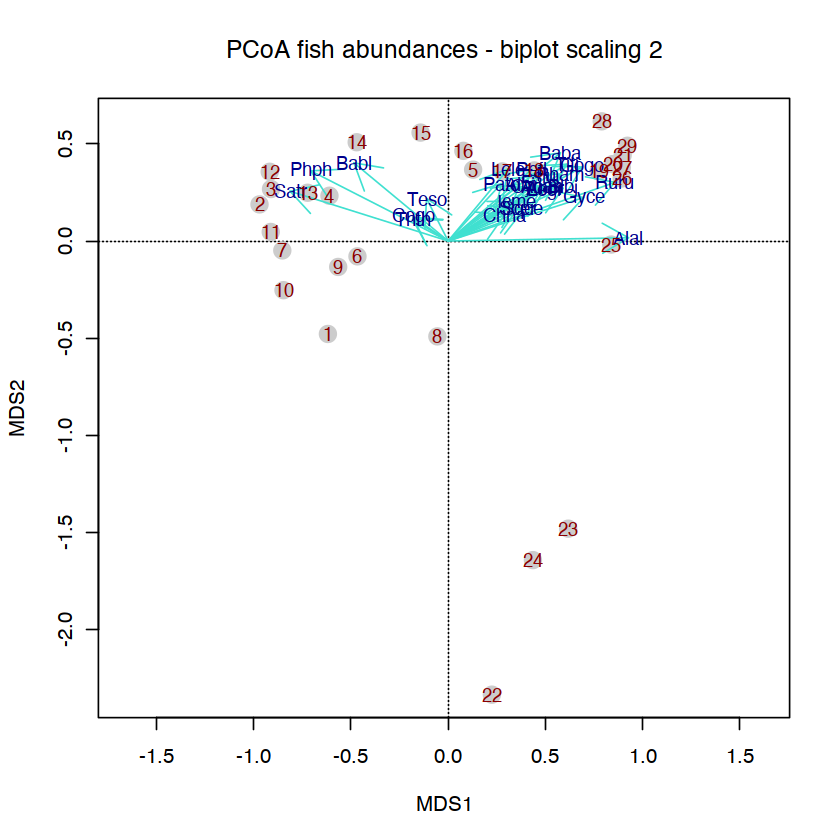

In [12]:
pl1 <- ordiplot(spe_pcoa, type = "none", scaling = 1, main = "PCoA fish abundances - biplot scaling 1")
points(pl1, "sites", pch = 21, cex = 1.75, col = "grey80", bg = "grey80")
points(pl1, "species", pch = 21, col = "turquoise", arrows = TRUE)
text(pl1, "species", col = "blue4", cex = 0.9)
text(pl1, "sites", col = "red4", cex = 0.9)

pl2 <- ordiplot(spe_pcoa, type = "none", scaling = 2, main = "PCoA fish abundances - biplot scaling 2")
points(pl2, "sites", pch = 21, cex = 1.75, col = "grey80", bg = "grey80")
points(pl2, "species", pch = 21, col = "turquoise", arrows = TRUE)
text(pl2, "species", col = "blue4", cex = 0.9)
text(pl2, "sites", col = "red4", cex = 0.9)

We can also fit response surfaces using `ordisurf()`:


***VECTORS

        MDS1     MDS2     r2 Pr(>r)    
dfs  0.99710 -0.07609 0.7210  0.001 ***
alt -0.99807  0.06208 0.5659  0.001 ***
slo -0.92225 -0.38660 0.1078  0.116    
flo  0.99746  0.07129 0.5324  0.001 ***
pH  -0.42673  0.90438 0.0480  0.535    
har  0.98804 -0.15417 0.2769  0.013 *  
pho  0.45343 -0.89129 0.6912  0.001 ***
nit  0.86338 -0.50456 0.6117  0.001 ***
amm  0.42719 -0.90416 0.7076  0.001 ***
oxy -0.76847  0.63989 0.7639  0.001 ***
bod  0.43152 -0.90210 0.8561  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999



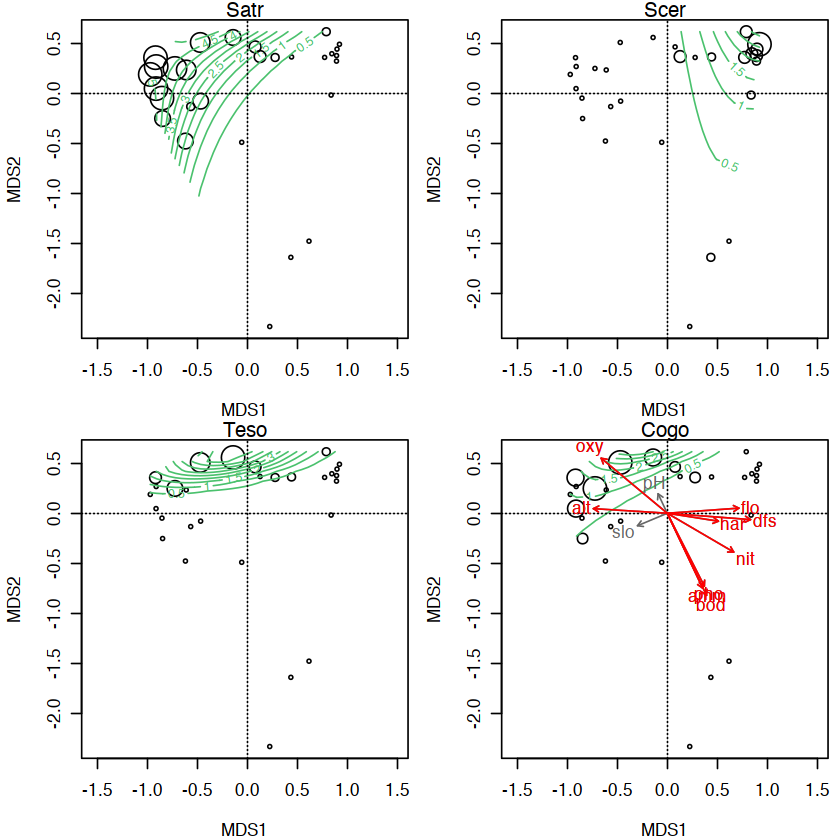

In [15]:
require('viridis')
palette(viridis(8))
par(mar = c(4, 4, 0.9, 0.5) + .1, mfrow = c(2, 2))
with(spe, tmp <- ordisurf(spe_pcoa ~ Satr, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Satr"))
abline(h = 0, v = 0, lty = 3)
with(spe, tmp <- ordisurf(spe_pcoa ~ Scer, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Scer"))
abline(h = 0, v = 0, lty = 3)
with(spe, tmp <- ordisurf(spe_pcoa ~ Teso, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Teso"))
abline(h = 0, v = 0, lty = 3)
with(spe, tmp <- ordisurf(spe_pcoa ~ Cogo, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Cogo"))
abline(h = 0, v = 0, lty = 3)

env <- read.csv("../Num_Ecol_R_book_ed1/DoubsEnv.csv")
env <- dplyr::select(env, -1)
env <- dplyr::slice(env, -8)

(spe_pcoa_env <- envfit(spe_pcoa, env, scaling = 2)) 
plot(spe_pcoa_env, col = "grey40")
plot(spe_pcoa_env, p.max = 0.05, col = "red")

## Handling mixed variable types

To handle mixed variable types (numerical, nominal, ordinal, binary) we can use the Gower distance. We do not use **vegan** for this, but rather the `daisy()` function in **cluster**.

I construct a environmental dataset that contains some mixed variables by column binding a dataset of seawater temperatures and a bioregional classificationn of the 58 coastal sections (the seaweed datasets):

In [4]:
bioreg <- read.csv('/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/bioregions.csv', header = TRUE)
load("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/SeaweedEnv.RData")
E <- cbind(bioreg, env) %>% 
  mutate(spal.prov = factor(spal.prov),
         spal.ecoreg = factor(spal.ecoreg),
         lombard = factor(lombard),
         bolton = factor(bolton))
head(E)
str(E)

,spal.prov,spal.ecoreg,lombard,bolton,febMean,febMax,febMed,febX95,febRange,augMean,⋯,augX5,augRange,annMean,annSD,annRange,febSD,augSD,annChl,augChl,febChl
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,BMP,NE,NamBR,BMP,13.00117,18.72044,12.66004,16.80969,6.070326,11.75228,⋯,10.12598,2.502093,12.33503,1.255298,1.2488912,1.625917,0.7665420,2.623040,11.070480,8.884580
2,BMP,NE,NamBR,BMP,13.37950,18.61897,13.18389,17.07242,5.889300,11.57731,⋯,10.08165,2.973370,12.38795,1.401646,1.8021850,1.753863,0.8969112,4.903870,8.760170,8.401560
3,BMP,NE,NamBR,BMP,13.36163,17.86458,13.23187,16.61114,5.431383,11.29382,⋯,10.01617,3.084130,12.24332,1.474712,2.0678127,1.703917,0.9408326,3.723187,8.356506,6.718254
4,BMP,NE,NamBR,BMP,13.28966,17.12073,13.10284,16.12137,5.049024,11.13296,⋯,10.03277,2.995822,12.15410,1.505176,2.1567012,1.593944,0.9393490,4.165980,4.164904,3.727157
5,BMP,NE,NamBR,BMP,12.81128,16.37829,12.40032,15.53240,4.977916,11.23448,⋯,10.17375,2.940255,11.94613,1.449530,1.5767921,1.517366,0.9542671,8.020257,8.765154,8.786165
6,BMP,NE,NamBR,BMP,12.40247,15.96730,11.75096,15.21999,5.142721,11.50199,⋯,10.38581,2.925087,11.83773,1.385862,0.9004776,1.501801,0.9768441,12.882601,7.591975,9.160030


'data.frame':	58 obs. of  22 variables:
 $ spal.prov  : Factor w/ 2 levels "AMP","BMP": 2 2 2 2 2 2 2 2 2 2 ...
 $ spal.ecoreg: Factor w/ 2 levels "ABE","NE": 2 2 2 2 2 2 2 2 2 2 ...
 $ lombard    : Factor w/ 4 levels "ABR","NamBR",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ bolton     : Factor w/ 4 levels "AMP","B-ATZ",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ febMean    : num  13 13.4 13.4 13.3 12.8 ...
 $ febMax     : num  18.7 18.6 17.9 17.1 16.4 ...
 $ febMed     : num  12.7 13.2 13.2 13.1 12.4 ...
 $ febX95     : num  16.8 17.1 16.6 16.1 15.5 ...
 $ febRange   : num  6.07 5.89 5.43 5.05 4.98 ...
 $ augMean    : num  11.8 11.6 11.3 11.1 11.2 ...
 $ augMin     : num  9.81 9.74 9.62 9.57 9.62 ...
 $ augMed     : num  11.8 11.6 11.3 11 11 ...
 $ augX5      : num  10.1 10.1 10 10 10.2 ...
 $ augRange   : num  2.5 2.97 3.08 3 2.94 ...
 $ annMean    : num  12.3 12.4 12.2 12.2 11.9 ...
 $ annSD      : num  1.26 1.4 1.47 1.51 1.45 ...
 $ annRange   : num  1.25 1.8 2.07 2.16 1.58 ...
 $ febSD      : num  1.63 1.7

Now we calculate the Gower distances and proceed with the PCoA as before:

In [6]:
library(cluster)

E_gower <- daisy(E, metric = "gower")
summary(E_gower)

E_mat <- as.matrix(E_gower)
E_mat[1:5, 1:5]

E_pcoa <- capscale(E_mat ~ 1)

1653 dissimilarities, summarized :
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.006058 0.181880 0.344160 0.321890 0.443730 0.724140 
Metric :  mixed ;  Types = N, N, N, N, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I 
Number of objects : 58

,1,2,3,4,5
1,0.00000000,0.03893923,0.05586573,0.09502716,0.06723042
2,0.03893923,0.00000000,0.02753347,0.06586077,0.04354363
3,0.05586573,0.02753347,0.00000000,0.04284923,0.04719106
4,0.09502716,0.06586077,0.04284923,0.00000000,0.06826655
5,0.06723042,0.04354363,0.04719106,0.06826655,0.00000000


In [7]:
summary(E_pcoa)


Call:
capscale(formula = E_mat ~ 1) 

Partitioning of squared Unknown distance:
              Inertia Proportion
Total            3.93          1
Unconstrained    3.93          1

Eigenvalues, and their contribution to the squared Unknown distance 

Importance of components:
                        MDS1   MDS2    MDS3    MDS4    MDS5    MDS6    MDS7
Eigenvalue            2.2311 1.0530 0.16179 0.11635 0.08678 0.05990 0.05202
Proportion Explained  0.5678 0.2680 0.04117 0.02961 0.02208 0.01524 0.01324
Cumulative Proportion 0.5678 0.8358 0.87693 0.90654 0.92863 0.94387 0.95711
                         MDS8     MDS9    MDS10    MDS11    MDS12    MDS13
Eigenvalue            0.04274 0.023523 0.019153 0.016634 0.013035 0.010275
Proportion Explained  0.01088 0.005986 0.004874 0.004233 0.003317 0.002615
Cumulative Proportion 0.96799 0.973971 0.978845 0.983079 0.986396 0.989011
                         MDS14    MDS15    MDS16    MDS17    MDS18     MDS19
Eigenvalue            0.008646 0.006938 0.

We can extract the various kinds of scores for manual plotting:

### Integrative assignment

In the light of all the possible analyses of the Doubs River study (i.e. the earlier PCA and CA analyses as well as the nMDS, RDA, CCA, and clustering techniques in the coming week), provide a full analysis of the Doubs River fish community structure study, focusing on:

1. the environmental drivers,

2. the fish community composition, and

3. an integrative view of the environmental structuring of the fish community.

You are welcome to suggest your own analyses, as necessary, to support the approaches already taken in the module. Your analysis must include one or several ordination techniques (with a justification for why they were selected), as well as a clustering approach. The more novelty you bring to the analysis the better for your marks. Critically discuss your findings in the context of the work initially done by Verneaux et al. (2003). Note that a critical discussion necessitates looking at all major findings of Verneaux et al. (2003) in the light of what your own analyses tell you. In doing so, you must support your own reasoning for agreeing or disagreeing by providing substantiating rational reasoning. 

A completely novel (and correct) data and theoretical analysis can earn you marks in excess of 100%.

Your analysis must be structured as follows: Introduction (with Aims and Objectives), Methods, Results, Discussion, References (minimum 10 references, all of which were published *after* 2003). Unlike previous work in the module, this assignment will be submitted as a professionally formatted MS Word document that follows the author guidelines of South African Journal of Botany. The page limit for the full body of work must not exceed 20 pages (minimum 13 pages), with the Figures/Tables not occupying more than 25% of the total page count. In order to professionally arrange the figures (multiple figures per page, and liberal use of subplots), please make use of the **ggarrange** package.

<span style="color:red">Submit your assignment by no later than 17:00 on Friday 30 July 2021.</span>

## References

Verneaux, J., Schmitt, A., Verneaux, V. and Prouteau, C. (2003). Benthic insects and fish of the Doubs River system: typological traits and the development of a species continuum in a theoretically extrapolated watercourse. Hydrobiologia 490, 63–74.